## Split and group images

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


<AxesSubplot:xlabel='dx', ylabel='count'>

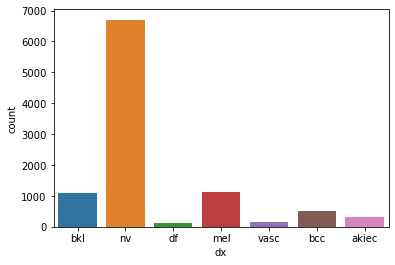

In [34]:
sns.countplot(x=df.dx)

In [21]:
# Split into train,test and validation sets maintaining class balance
train_df, test_df = train_test_split(df, test_size=0.4,random_state=5,stratify=df.dx)
test_df, val_df = train_test_split(test_df, test_size=0.5,random_state=5,stratify=test_df.dx)

In [35]:
#path to all images
data_dir = os.getcwd() + "/data/images_all/"

#path to destination directories
train_dest_dir = os.getcwd() + "/data/train/"
val_dest_dir = os.getcwd() + "/data/val/"
test_dest_dir = os.getcwd() + "/data/test/"

In [36]:
#Extract labels into a list
label=df['dx'].unique().tolist()  

In [37]:
def sort_images(df,dest_dir,label=label):
    """Make subfolder for each class and populate with images"""
    label_images = []
    for i in label:
        os.mkdir(dest_dir + str(i) + "/")
        sample = df[df['dx'] == i]['image_id']
        label_images.extend(sample)
        for id in label_images:
            shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
        label_images=[]


In [38]:
# Copy images to new folders
sort_images(df=train_df,dest_dir=train_dest_dir)
sort_images(df=val_df,dest_dir=val_dest_dir)
sort_images(df=test_df,dest_dir=test_dest_dir)